In [11]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
import matplotlib.pyplot as plt


In [12]:
num_of_nodes = 1000

# Barabási-Albert
num_of_edges = 5
ba_graph = nx.barabasi_albert_graph(num_of_nodes, num_of_edges)
ba_model = ep.SIRModel(ba_graph)

# Watts-Strogatz
k_nearest_neighbors = 6
rewiring_probability = 0.1
ws_graph = nx.watts_strogatz_graph(num_of_nodes, k_nearest_neighbors, rewiring_probability)
ws_model = ep.SIRModel(ws_graph)

# Erdős-Rényi
edge_creation_probability = 0.1
er_graph = nx.erdos_renyi_graph(num_of_nodes, edge_creation_probability)
er_model = ep.SIRModel(er_graph)

In [13]:
config = mc.Configuration()
config.add_model_parameter('beta', 0.3)
config.add_model_parameter('gamma', 0.1)

config.add_model_initial_configuration("Infected", [i for i in range(int(0.1*1000))]) 

ba_model.set_initial_status(config)
ws_model.set_initial_status(config)
er_model.set_initial_status(config)

# Run simulations
ba_iterations = ba_model.iteration_bunch(200)
ws_iterations = ws_model.iteration_bunch(200)
er_iterations = er_model.iteration_bunch(200)

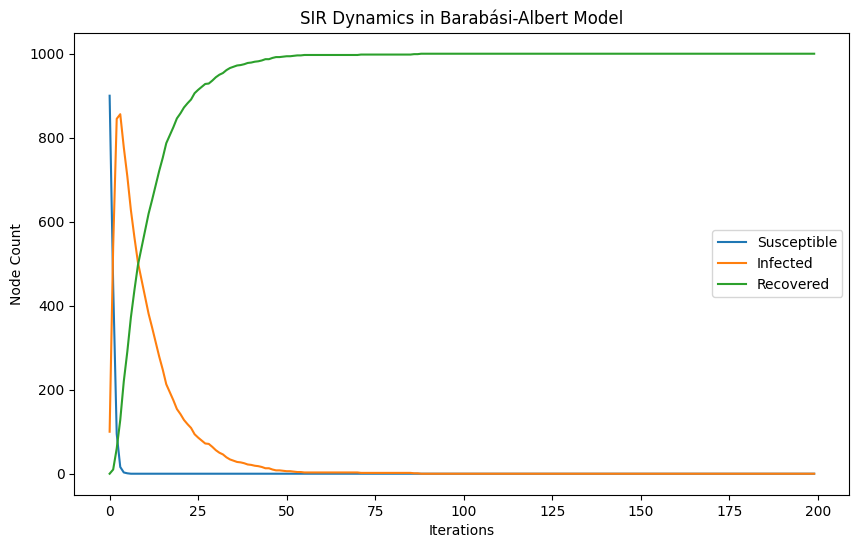

In [14]:
# Extract SIR dynamics for Barabási-Albert model
ba_susceptible = [it['node_count'][0] for it in ba_iterations]
ba_infected = [it['node_count'][1] for it in ba_iterations]
ba_recovered = [it['node_count'][2] for it in ba_iterations]

# Plotting the Barabási-Albert model dynamics
plt.figure(figsize=(10, 6))
plt.plot(ba_susceptible, label="Susceptible")
plt.plot(ba_infected, label="Infected")
plt.plot(ba_recovered, label="Recovered")
plt.title("SIR Dynamics in Barabási-Albert Model")
plt.xlabel("Iterations")
plt.ylabel("Node Count")
plt.legend()
plt.show()

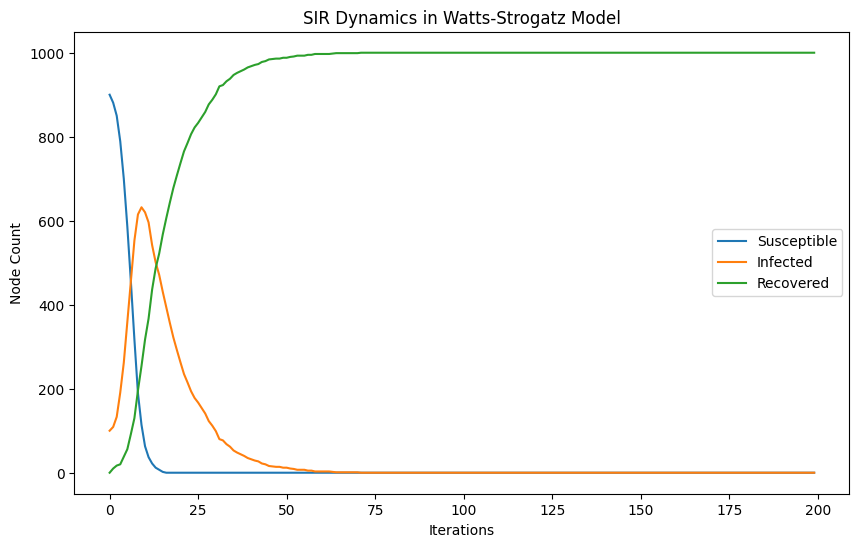

In [15]:
# Extract SIR dynamics for Watts-Strogatz model
ws_susceptible = [it['node_count'][0] for it in ws_iterations]
ws_infected = [it['node_count'][1] for it in ws_iterations]
ws_recovered = [it['node_count'][2] for it in ws_iterations]

# Plotting the Watts-Strogatz model dynamics
plt.figure(figsize=(10, 6))
plt.plot(ws_susceptible, label="Susceptible")
plt.plot(ws_infected, label="Infected")
plt.plot(ws_recovered, label="Recovered")
plt.title("SIR Dynamics in Watts-Strogatz Model")
plt.xlabel("Iterations")
plt.ylabel("Node Count")
plt.legend()
plt.show()

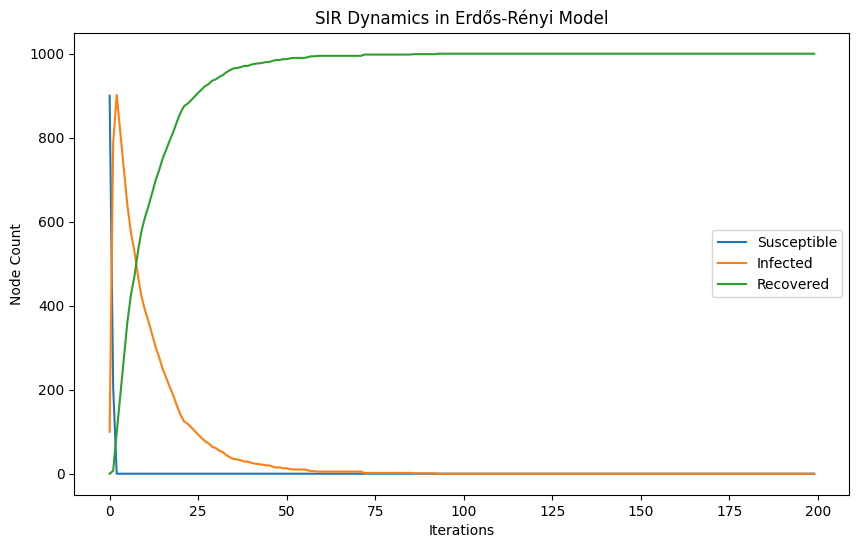

In [16]:
# Extract SIR dynamics for Erdős-Rényi model
er_susceptible = [it['node_count'][0] for it in er_iterations]
er_infected = [it['node_count'][1] for it in er_iterations]
er_recovered = [it['node_count'][2] for it in er_iterations]

# Plotting the Erdős-Rényi model dynamics
plt.figure(figsize=(10, 6))
plt.plot(er_susceptible, label="Susceptible")
plt.plot(er_infected, label="Infected")
plt.plot(er_recovered, label="Recovered")
plt.title("SIR Dynamics in Erdős-Rényi Model")
plt.xlabel("Iterations")
plt.ylabel("Node Count")
plt.legend()
plt.show()